In [1]:
import pandas as pd

df=pd.read_csv('Customers.csv')
df1=pd.read_csv('Products.csv')
df2=pd.read_csv('Transactions.csv')

In [2]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
df1.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


**CUSTOMERS.CSV FILE**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df['Region'].value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


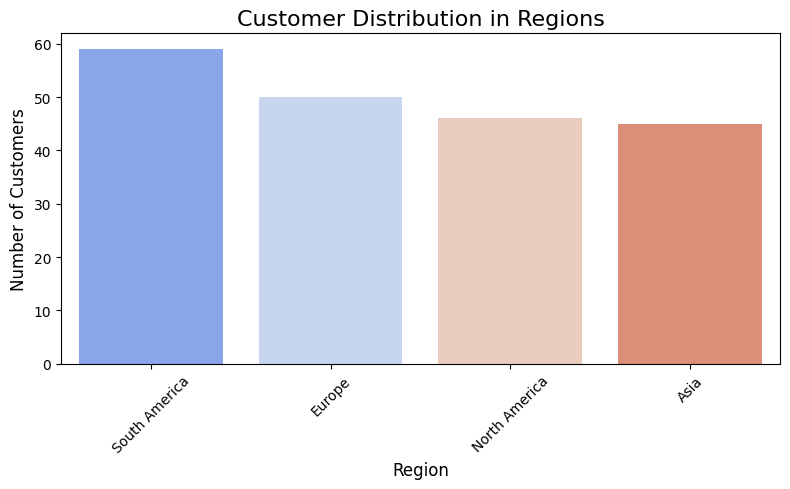

In [21]:
top_5_regions = df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_regions.index, y=top_5_regions.values, palette="coolwarm", dodge=False, legend=False, hue=top_5_regions.index)
plt.title("Customer Distribution in Regions", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the customers.csv file, the total distribution of the customers over the distribution can be found which results in the above plot.

South America (59 customers):
The largest customer base comes from South America, making it a critical region for revenue generation and targeted marketing efforts.
Europe (50 customers):
Europe is the second-largest region, showing strong customer engagement. Maintaining and enhancing service quality here could solidify market presence.
North America (46 customers):
With a slightly smaller customer base than Europe, North America represents a stable market with potential for growth through strategic promotions.
Asia (45 customers):
Asia has a comparable number of customers to North America, indicating a significant presence. Tailored strategies based on cultural preferences could drive further engagement.


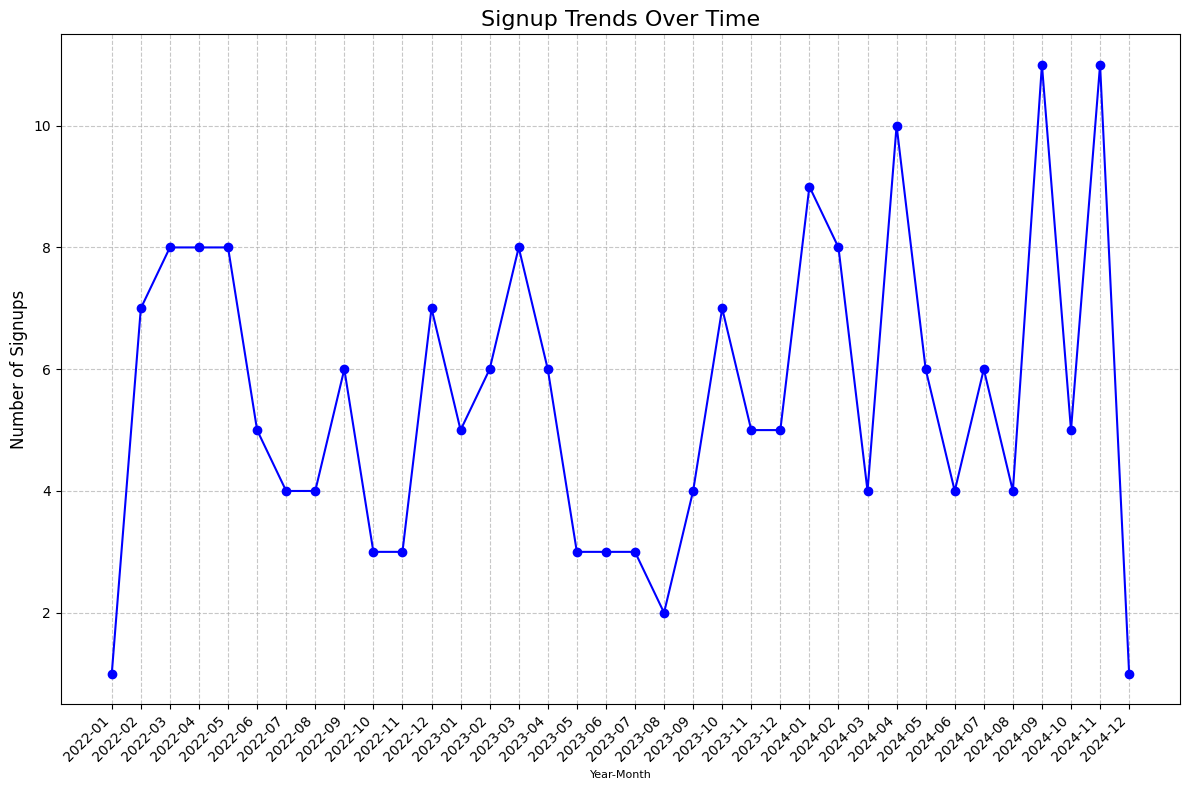

In [27]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['YearMonth'] = df['SignupDate'].dt.to_period('M')
signup_trends = df.groupby('YearMonth').size().reset_index(name='Signups')
plt.figure(figsize=(12, 8))
plt.plot(signup_trends['YearMonth'].astype(str), signup_trends['Signups'], marker='o', color='b')
plt.xticks(rotation=45, ha='right')
plt.title('Signup Trends Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=8)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart illustrates the trend of user signups over time, specifically on a monthly basis. The x-axis represents the year and month, while the y-axis shows the number of signups during that period. Each data point on the line indicates the total signups for a particular month. The line's direction and slope reveal whether signups are increasing, decreasing, or remaining stable over time.
Key Insights:
Provides a visual representation of signup patterns over time.
Shows the fluctuation in signups across different months and years.
Helps identify periods of growth or decline in user acquisition.
Useful for understanding overall signup trends and potential seasonality.

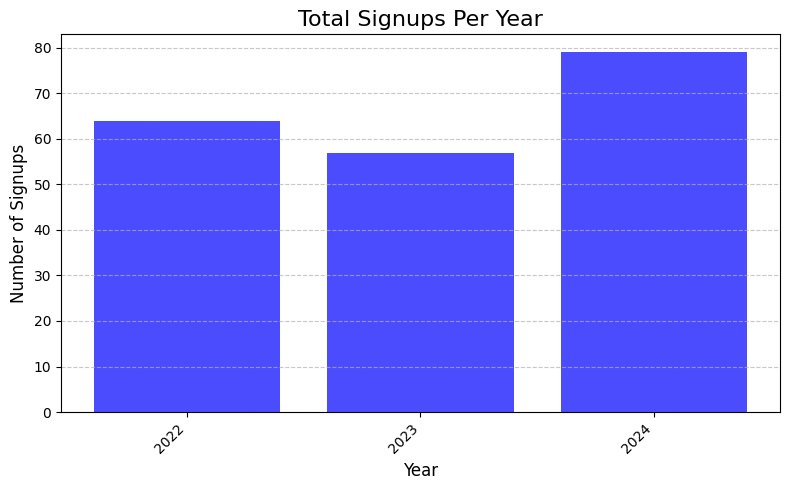

In [28]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['Year'] = df['SignupDate'].dt.year
signup_trends = df.groupby('Year').size().reset_index(name='Signups')
plt.figure(figsize=(8, 5))
plt.bar(signup_trends['Year'], signup_trends['Signups'], color='b', alpha=0.7)
plt.xticks(signup_trends['Year'], rotation=45, ha='right')
plt.title('Total Signups Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The chart presents the total number of user signups for each year. Each bar represents a year, and the height of the bar corresponds to the total number of signups received during that year. This chart provides a clear overview of yearly signup trends.
Key Insights:
Shows the total number of signups for each year.
Allows for easy comparison of signups across different years.
Helps identify years with significant increases or decreases in signups.
Provides a high-level understanding of user acquisition growth or decline over the years.

In [29]:
df1.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


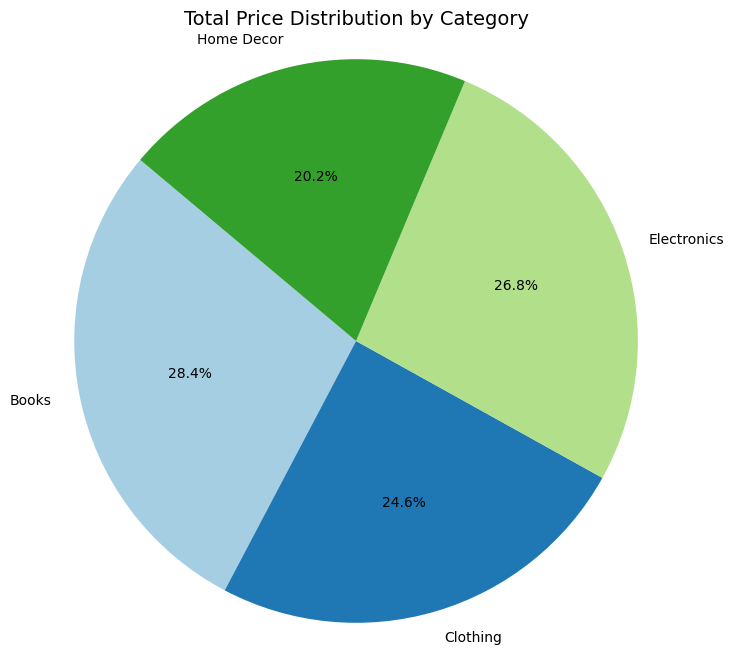

In [30]:
category_total_price = df1.groupby('Category')['Price'].sum().reset_index()
category_total_price.columns = ['Category', 'Total Price']
plt.figure(figsize=(8, 8))
plt.pie(
    category_total_price['Total Price'],
    labels=category_total_price['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Total Price Distribution by Category', fontsize=14)
plt.axis('equal')
plt.show()

The chart illustrates the distribution of the total price of products across different categories. Each slice of the pie represents a product category, and its size corresponds to the proportion of the total price attributed to that category. The percentages displayed on each slice indicate the contribution of each category to the overall total price.
Key Insights:
Shows the relative contribution of each product category to the total price.
Allows for easy comparison of the price distribution across categories.
Helps identify the categories with the highest and lowest total prices.
Provides a visual representation of the price distribution for all product categories.

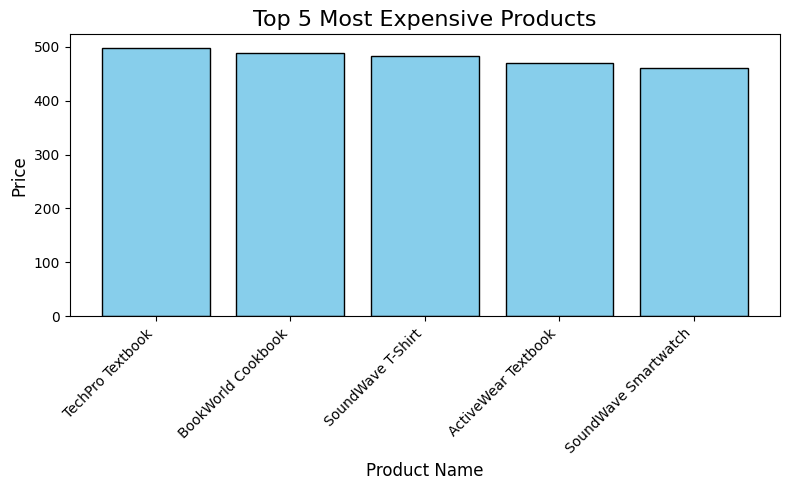

In [37]:
top_5_products = df1.nlargest(5, 'Price')
plt.figure(figsize=(8, 5))
plt.bar(top_5_products['ProductName'], top_5_products['Price'], color='skyblue', edgecolor='black')
plt.title('Top 5 Most Expensive Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



The chart displays the top 5 most expensive products based on their individual prices. Each bar represents a product, and the height of the bar corresponds to its price. The products are ranked in descending order of price, with the most expensive product at the top.

In [38]:
df1['Category'].value_counts()
df1['ProductName'].value_counts()

,count
ProductName,
ActiveWear Smartwatch,4
SoundWave Headphones,4
BookWorld Biography,3
TechPro T-Shirt,3
SoundWave Cookbook,3
...,...
BookWorld Jacket,1
ComfortLiving Smartphone,1
SoundWave T-Shirt,1


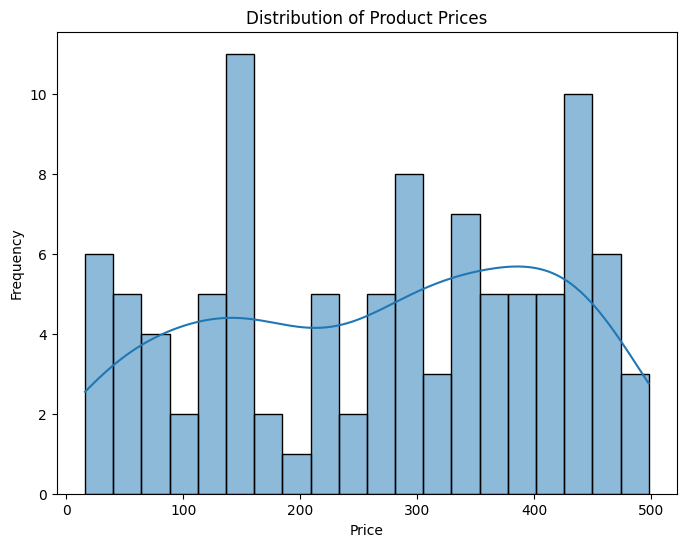

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The chart displays the distribution of product prices using a histogram. The x-axis represents the price range, while the y-axis represents the frequency or count of products falling within each price range. The bars in the histogram show the distribution of prices, indicating the concentration of products at different price points. The kernel density estimation (KDE) line provides a smoothed representation of the price distribution.

In [44]:
df2.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [50]:
merged_df = pd.merge(df2, df1[['ProductID', 'ProductName']], on='ProductID', how='left')

<ipython-input-55-c4fa493fbc4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


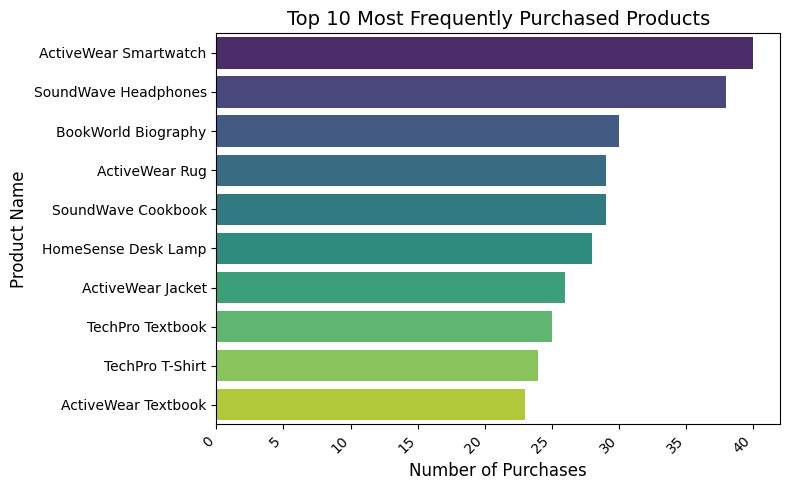

In [55]:
top_products = merged_df['ProductName'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart displays the top 10 most frequently purchased products. Each bar represents a product, and the height of the bar corresponds to the number of times it was purchased. The products are ranked in descending order of purchase frequency, with the most frequently purchased product at the top.

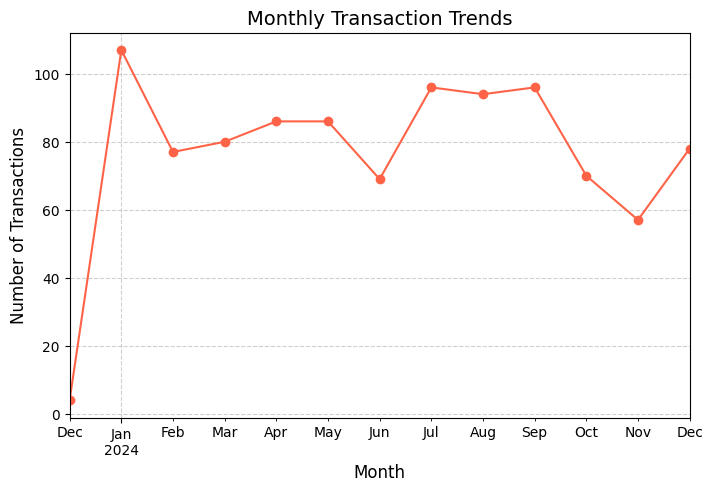

In [56]:
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])
df2['Month'] = df2['TransactionDate'].dt.to_period('M')
monthly_trends = df2.groupby('Month').size()
plt.figure(figsize=(8, 5))
monthly_trends.plot(kind='line', marker='o', color='tomato')
plt.title('Monthly Transaction Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The chart illustrates the trend of transactions over time on a monthly basis. The x-axis represents the month, while the y-axis shows the number of transactions during that period. Each data point on the line indicates the total transactions for a particular month. The line's direction and slope reveal whether transactions are increasing, decreasing, or remaining stable over time

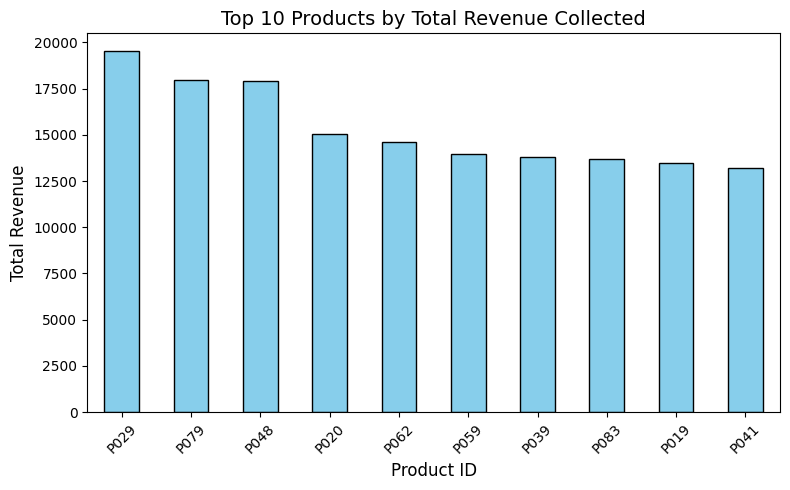

In [57]:
product_revenue = df2.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
product_revenue.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Products by Total Revenue Collected', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart displays the top 10 products that have generated the highest total revenue. Each bar represents a product, and the height of the bar corresponds to the total revenue generated by that product. The products are ranked in descending order of total revenue, with the highest-revenue-generating product at the top

In [59]:
merged_customer_transactions = pd.merge(df2, df[['CustomerID', 'CustomerName']], on='CustomerID', how='left')

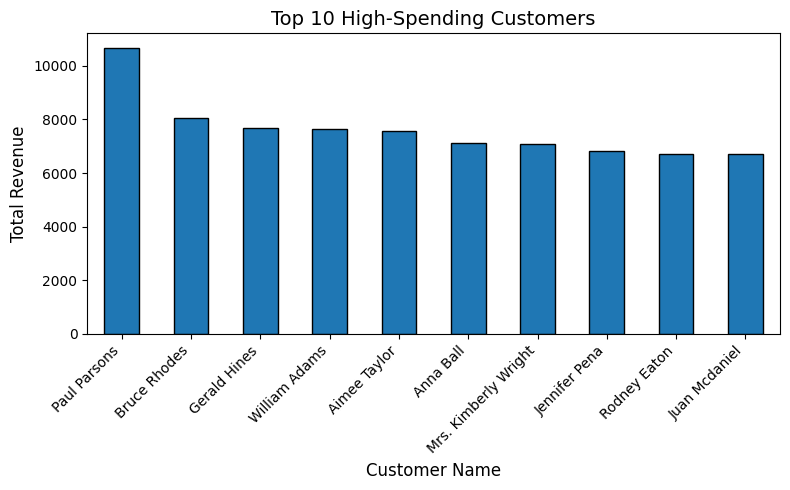

In [63]:
customer_total_revenue = merged_customer_transactions.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
top_10_customers = customer_total_revenue.head(10)
plt.figure(figsize=(8, 5))
top_10_customers.plot(kind='bar', edgecolor='black')
plt.title('Top 10 High-Spending Customers', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Description:
The chart displays the top 10 customers who have generated the highest total revenue. Each bar represents a customer, and the height of the bar corresponds to the total revenue generated by that customer. The customers are ranked in descending order of total revenue, with the highest-spending customer at the top. This chart helps identify the most valuable customers in terms of revenue contribution.
Key Insights:
It highlights the top 10 customers contributing the most revenue.
Customer names are displayed on the x-axis, while the total revenue generated is shown on the y-axis.
The bars are arranged in descending order of revenue, making it easy to spot the highest-spending customers.